In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
import librosa
from tqdm import tqdm

In [2]:
df=pd.read_csv('metadata.csv')

In [3]:
df

,File_name,Covid_status,Gender,Nationality
0,ABZpUgKz_cough,n,f,I
1,ACKYAaOu_cough,n,m,I
2,AEthVqjZ_cough,n,m,I
3,AFuFLsFC_cough,n,m,I
4,AHGDPacO_cough,p,f,I
...,...,...,...,...
1035,zuEzdVVo_cough,p,m,I
1036,zwWWpDNo_cough,n,m,I
1037,zwYEGgem_cough,n,m,I
1038,zzOYyYyA_cough,n,m,I


In [4]:
df.nunique()

File_name       1040
Covid_status       2
Gender             2
Nationality        2
dtype: int64

In [5]:
labels, counts = np.unique(df['Gender'], return_counts=True)
print('{} : {}'.format(labels,counts) )

labels, counts = np.unique(df['Covid_status'], return_counts=True)
print('{} : {}'.format(labels,counts) )

labels, counts = np.unique(df['Nationality'], return_counts=True)
print('{} : {}'.format(labels,counts) )

['f' 'm'] : [249 791]
['n' 'p'] : [965  75]
['I' 'O'] : [923 117]


In [6]:
positives=[x for (i,x) in enumerate(df['File_name']) if df['Covid_status'][i]=='p']
negatives=[x for (i,x) in enumerate(df['File_name']) if df['Covid_status'][i]=='n']

print(len(positives))
print(len(negatives))

75
965


# copied positive and negative cases to respective folders

for i in positives:
    from_path=r'C:\Users\Saranga\Desktop\COVID cough\DiCOVA_Train_Val_Data_Release\AUDIO\\{}.flac'.format(i)
    to_path=r'C:\Users\Saranga\Desktop\COVID cough\DiCOVA_Train_Val_Data_Release\data\p'
    shutil.copy(from_path, to_path)
    
for i in negatives:
    from_path=r'C:\Users\Saranga\Desktop\COVID cough\DiCOVA_Train_Val_Data_Release\AUDIO\\{}.flac'.format(i)
    to_path=r'C:\Users\Saranga\Desktop\COVID cough\DiCOVA_Train_Val_Data_Release\data\n'
    shutil.copy(from_path, to_path)
    

    


In [7]:
ps=sorted(os.listdir(r'C:\Users\Saranga\Desktop\COVID cough\DiCOVA_Train_Val_Data_Release\data\p'))
ns=sorted(os.listdir(r'C:\Users\Saranga\Desktop\COVID cough\DiCOVA_Train_Val_Data_Release\data\n'))

for i in range(0,len(ps)):
    if ps[i]==positives[i]+str('.flac'):
        pass
    else:
        print('False value found')
        break
        
for i in range(0,len(ns)):
    if ns[i]==negatives[i]+str('.flac'):
        pass
    else:
        print('False value found')
        break
    

In [8]:
dataset_path=r'data'

In [9]:
duration_list=[]

for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
    print('Processing ', dirpath.split("/")[-1])
    for f in tqdm(filenames):
        fpath=os.path.join(dirpath,f)
        #print(fpath)
        
        file,_=librosa.load(fpath)
        dur=librosa.get_duration(file)
        duration_list.append(dur)
        #print(dur)
        
    print('\n')
        
        

0it [00:00, ?it/s]
  0%|                                                                                          | 0/965 [00:00<?, ?it/s]

Processing  data


Processing  data\n


  0%|                                                                                           | 0/75 [00:00<?, ?it/s]



Processing  data\p


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [00:20<00:00,  3.67it/s]

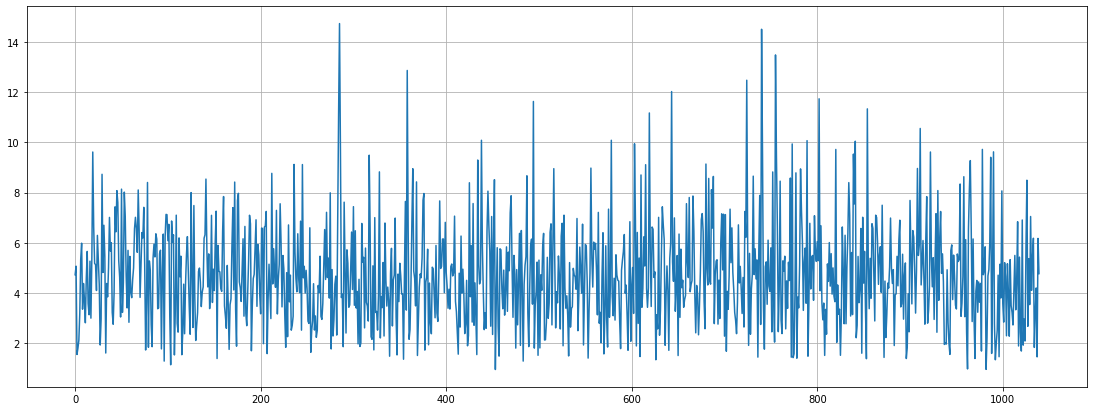

In [10]:
plt.figure(figsize=(19,7))
plt.plot(duration_list)
plt.grid(True)
#plt.savefig('Durations.png', dpi=750)
plt.show()

In [11]:
print(max(duration_list))
print(min(duration_list))

14.732471655328798
0.9492517006802721


In [12]:
less_than_list=[]
greater_than_list=[]

for j in range(1,13):
    ups=downs=0
    for i in duration_list:
        if i>j:
            ups+=1
        else:
            downs+=1
        
    less_than_list.append(ups)
    greater_than_list.append(downs)
    


In [13]:
for index in range(0,len(less_than_list)):
    print('{} samples have durations greater than {} seconds'.format(less_than_list[index],index+1))
    print('{} samples have durations lesser than {} seconds'.format(greater_than_list[index],index+1))
    print('') 

1037 samples have durations greater than 1 seconds
3 samples have durations lesser than 1 seconds

950 samples have durations greater than 2 seconds
90 samples have durations lesser than 2 seconds

821 samples have durations greater than 3 seconds
219 samples have durations lesser than 3 seconds

643 samples have durations greater than 4 seconds
397 samples have durations lesser than 4 seconds

416 samples have durations greater than 5 seconds
624 samples have durations lesser than 5 seconds

249 samples have durations greater than 6 seconds
791 samples have durations lesser than 6 seconds

134 samples have durations greater than 7 seconds
906 samples have durations lesser than 7 seconds

71 samples have durations greater than 8 seconds
969 samples have durations lesser than 8 seconds

35 samples have durations greater than 9 seconds
1005 samples have durations lesser than 9 seconds

16 samples have durations greater than 10 seconds
1024 samples have durations lesser than 10 seconds

1

In [14]:
print(sum(duration_list)/len(duration_list))

4.723176696319556
